Problem 1 : CNN for Image Classification
- Using your preferred machine learning library, train a small convolutional network (CNN) to classify images from the CIFAR10 dataset. Note that most libraries have utility functions to download and load this dataset (TensorFlow, PyTorch, keras). Using the API for loading the dataset will readily divide it into training and testing sets. Randomly sample 20% of the training set and use that as your new training set for the purposes of this problem. Use the test set for validation. Implement the following in one .ipynb with all the output shown (already run)

Importing the Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

- Loading the CIFAR 10 Dataset
- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
- There are 50000 training images and 10000 test images.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Shapes of  X train and X test shapes 

In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Shapes of labels train and test

In [4]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


Classes of the CIFAR 10 Dataset

In [5]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Shuffling the training dataset

In [6]:
x_train, y_train = shuffle(x_train, y_train)

Define the list of classes representing different object categories

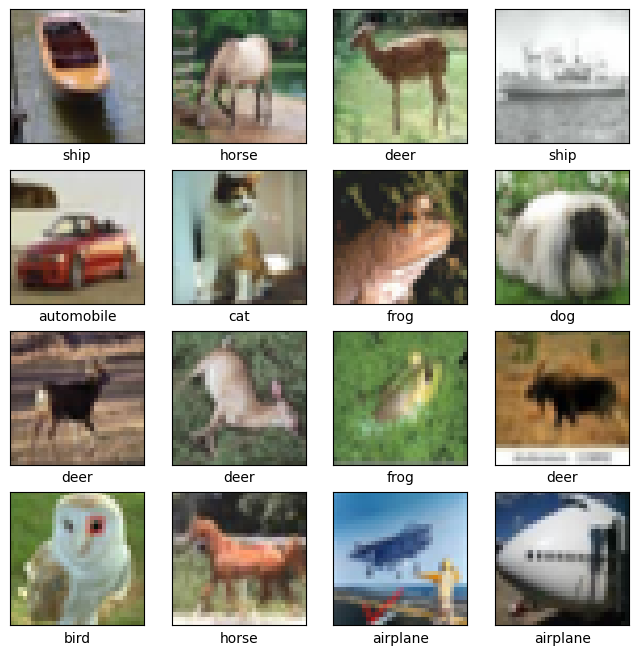

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(8,8))
# Loop through the first 16 images in the training set
for itr in range(16):
    plt.subplot(4,4,itr+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[itr])
    plt.xlabel(classes[y_train[itr][0]])
plt.show()

Normalization

Convert pixel values to 'float32' and normalize them between 0 and 1 for both training and test samples

In [8]:
x_train = x_train.astype('float32') / 255.0
x_train[:1]

array([[[[0.5137255 , 0.49019608, 0.41960785],
         [0.5019608 , 0.4862745 , 0.3882353 ],
         [0.5137255 , 0.49411765, 0.40784314],
         ...,
         [0.74509805, 0.7411765 , 0.7529412 ],
         [0.7921569 , 0.7882353 , 0.80784315],
         [0.7764706 , 0.77254903, 0.7921569 ]],

        [[0.49411765, 0.47058824, 0.4       ],
         [0.4745098 , 0.45882353, 0.35686275],
         [0.5058824 , 0.49019608, 0.40392157],
         ...,
         [0.73333335, 0.7294118 , 0.7490196 ],
         [0.78039217, 0.7764706 , 0.79607844],
         [0.7490196 , 0.74509805, 0.7647059 ]],

        [[0.5058824 , 0.4862745 , 0.4117647 ],
         [0.50980395, 0.49411765, 0.39215687],
         [0.5254902 , 0.5058824 , 0.41960785],
         ...,
         [0.7372549 , 0.73333335, 0.7529412 ],
         [0.74509805, 0.7372549 , 0.7607843 ],
         [0.7607843 , 0.75686276, 0.7764706 ]],

        ...,

        [[0.10588235, 0.09019608, 0.09019608],
         [0.06666667, 0.0627451 , 0.07450981]

In [9]:
x_test = x_test.astype('float32') / 255.0
x_test[:1]

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

One hot Encoding 

- Converting class labels to one-hot encoded format
- The number of classes is set to 10, representing the ten object categories

In [10]:
no_classes = 10
y_train = to_categorical(y_train, no_classes)
y_test = to_categorical(y_test, no_classes)
print(y_train[:1])
print(y_test[:1]) 

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Random Sampling

Calculating the number of samples to be extracted for validation from the x_train dataset

In [11]:
num_sam = int(0.2 * len(x_train))
num_sam

10000

Performing random sampling without replacement to get the indices of the samples for validation

In [12]:
sampling = np.random.choice(len(x_train),num_sam, replace = False)
sampling

array([ 7956, 12298, 47946, ..., 36707, 40559,  2355])

Creating a new x_train dataset, y_train dataset containing the randomly selected samples

In [13]:
x_train_new = x_train[sampling]
y_train_new = y_train[sampling]
print(x_train_new.shape)
print(y_train_new.shape)

(10000, 32, 32, 3)
(10000, 10)


Using Test Set as a Validation

In [14]:
x_val = x_test
y_val = y_test

Setting batch and epochs to 32 and 5

In [15]:
batch = 32
epoch = 5

1- MLP
- Build a multi-layer perceptron with the following layers:
- Fully connected layer with 512 units and a sigmoid activation function
- Fully connected layer with 512 units and a sigmoid activation function
- Output layer with the suitable activation function and number of neurons for the classification task

In [16]:
model_mlp1 = Sequential()
model_mlp1.add(Flatten(input_shape = (32,32,3)))
model_mlp1.add(Dense(512, activation='sigmoid'))
model_mlp1.add(Dense(512, activation='sigmoid'))
model_mlp1.add(Dense(no_classes, activation='softmax'))
model_mlp1.summary()
'''
Compiling the model using 'adam' optimizer, 'categorical_crossentropy' as the loss function 
(appropriate for multi-class classification), and 'accuracy' as the evaluation metric.
'''
model_mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [17]:
history_mlp1 = model_mlp1.fit(x_train_new, y_train_new, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 6s 17ms/step - loss: 2.0487 - accuracy: 0.2408 - val_loss: 1.9176 - val_accuracy: 0.3018
Epoch 2/5
313/313 [==============================] - 5s 16ms/step - loss: 1.8966 - accuracy: 0.3086 - val_loss: 1.8177 - val_accuracy: 0.3521
Epoch 3/5
313/313 [==============================] - 5s 16ms/step - loss: 1.8230 - accuracy: 0.3394 - val_loss: 1.8169 - val_accuracy: 0.3389
Epoch 4/5
313/313 [==============================] - 5s 16ms/step - loss: 1.7923 - accuracy: 0.3507 - val_loss: 1.8031 - val_accuracy: 0.3461
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 1.7565 - accuracy: 0.3636 - val_loss: 1.7937 - val_accuracy: 0.3570


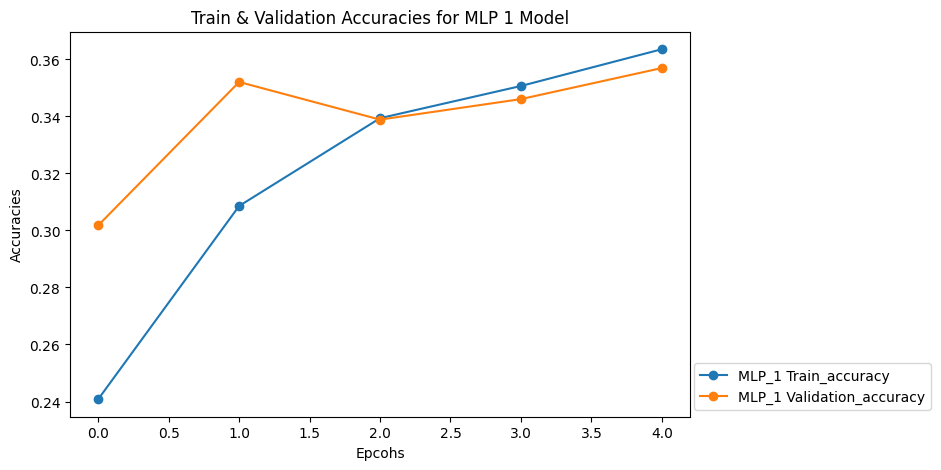

In [18]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Accuracies for MLP 1 Model')
plt.plot(history_mlp1.history['accuracy'], label = 'MLP_1 Train_accuracy', marker = 'o')
plt.plot(history_mlp1.history['val_accuracy'], label = 'MLP_1 Validation_accuracy', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Accuracies')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

Report Question : Change the number of layers and the number of neurons per layer in the MLP, plot/tabulate the training and validation accuracies and comment on the results

In the model MLP2, Hidden layers are increased to 5 with decreasing the number of neurons in the each layers.

In [19]:
model_mlp2 = Sequential()
model_mlp2.add(Flatten(input_shape = (32,32,3)))
model_mlp2.add(Dense(512, activation='sigmoid'))
model_mlp2.add(Dense(256, activation='sigmoid'))
model_mlp2.add(Dense(128, activation='sigmoid'))
model_mlp2.add(Dense(64, activation='sigmoid'))
model_mlp2.add(Dense(32, activation='sigmoid'))
model_mlp2.add(Dense(no_classes, activation='softmax'))
model_mlp2.summary()
model_mlp2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)               

In [20]:
history_mlp2 = model_mlp2.fit(x_train_new, y_train_new, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 6s 16ms/step - loss: 2.2302 - accuracy: 0.1413 - val_loss: 2.1321 - val_accuracy: 0.1716
Epoch 2/5
313/313 [==============================] - 5s 15ms/step - loss: 2.1095 - accuracy: 0.1719 - val_loss: 2.0886 - val_accuracy: 0.1769
Epoch 3/5
313/313 [==============================] - 5s 16ms/step - loss: 2.0759 - accuracy: 0.1760 - val_loss: 2.1100 - val_accuracy: 0.1768
Epoch 4/5
313/313 [==============================] - 5s 16ms/step - loss: 2.0595 - accuracy: 0.1856 - val_loss: 2.0666 - val_accuracy: 0.1914
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 2.0537 - accuracy: 0.1873 - val_loss: 2.0376 - val_accuracy: 0.1916


- As we got the less accuracy than before because model_mlp2 is a deeper and more complex model with five hidden layers and decreasing neurons. 
- Deeper models are generally harder to train, especially when the dataset is limited
- The increased complexity of model_mlp2 may cause it to memorize the training data instead of learning general patterns.

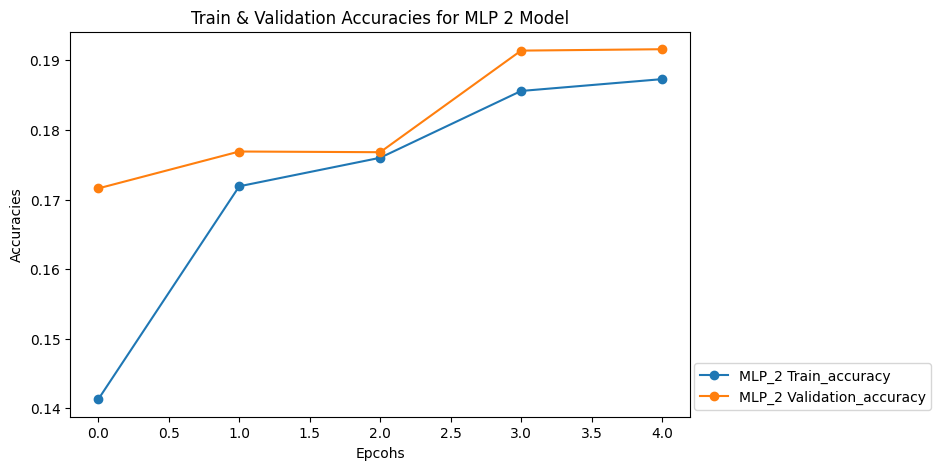

In [21]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Accuracies for MLP 2 Model')
plt.plot(history_mlp2.history['accuracy'], label = 'MLP_2 Train_accuracy', marker = 'o')
plt.plot(history_mlp2.history['val_accuracy'], label = 'MLP_2 Validation_accuracy', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Accuracies')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

In the model 3, We tried with three layers with the same number of neurons in all the layers with sigmoid activation function in all the layers and softmax for the output layer

In [22]:
model_mlp3 = Sequential()
model_mlp3.add(Flatten(input_shape = (32,32,3)))
model_mlp3.add(Dense(256, activation='sigmoid'))
model_mlp3.add(Dense(256, activation='sigmoid'))
model_mlp3.add(Dense(256, activation='sigmoid'))
model_mlp3.add(Dense(no_classes, activation='softmax'))
model_mlp3.summary()
model_mlp3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               786688    
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


In [23]:
history_mlp3 = model_mlp3.fit(x_train_new, y_train_new, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 3s 8ms/step - loss: 2.1431 - accuracy: 0.1889 - val_loss: 2.0125 - val_accuracy: 0.2458
Epoch 2/5
313/313 [==============================] - 3s 8ms/step - loss: 1.9619 - accuracy: 0.2683 - val_loss: 1.9168 - val_accuracy: 0.3024
Epoch 3/5
313/313 [==============================] - 3s 9ms/step - loss: 1.9022 - accuracy: 0.2981 - val_loss: 1.8798 - val_accuracy: 0.2985
Epoch 4/5
313/313 [==============================] - 3s 9ms/step - loss: 1.8770 - accuracy: 0.3208 - val_loss: 1.9037 - val_accuracy: 0.2963
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 1.8418 - accuracy: 0.3245 - val_loss: 1.8714 - val_accuracy: 0.3105


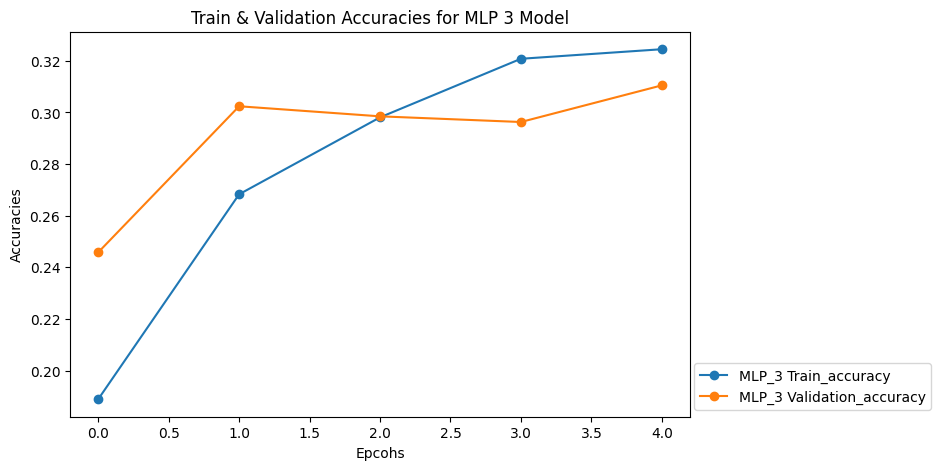

In [24]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Accuracies for MLP 3 Model')
plt.plot(history_mlp3.history['accuracy'], label = 'MLP_3 Train_accuracy', marker = 'o')
plt.plot(history_mlp3.history['val_accuracy'], label = 'MLP_3 Validation_accuracy', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Accuracies')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

- model_mlp3 is simpler than model_mlp2, making it easier to optimize and less prone to overfitting. 
- Simpler models may perform better when dealing with limited data.
- Having fewer layers and neurons can help the model focus on more essential features of the data, reducing the chances of memorizing noise in the training set.

In [25]:
model_mlp4 = Sequential()
model_mlp4.add(Flatten(input_shape = (32,32,3)))
model_mlp4.add(Dense(1024, activation='sigmoid'))
model_mlp4.add(Dense(512, activation='sigmoid'))
model_mlp4.add(Dense(no_classes, activation='softmax'))
model_mlp4.summary()
model_mlp4.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_13 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [26]:
history_mlp4 = model_mlp4.fit(x_train_new, y_train_new, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 11s 33ms/step - loss: 2.1170 - accuracy: 0.2246 - val_loss: 1.9466 - val_accuracy: 0.2766
Epoch 2/5
313/313 [==============================] - 10s 32ms/step - loss: 1.9096 - accuracy: 0.3036 - val_loss: 1.9643 - val_accuracy: 0.2881
Epoch 3/5
313/313 [==============================] - 9s 29ms/step - loss: 1.8484 - accuracy: 0.3282 - val_loss: 1.8919 - val_accuracy: 0.2912
Epoch 4/5
313/313 [==============================] - 9s 30ms/step - loss: 1.8118 - accuracy: 0.3446 - val_loss: 1.8906 - val_accuracy: 0.3108
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.7877 - accuracy: 0.3498 - val_loss: 1.7485 - val_accuracy: 0.3825


- model_mlp4 has a larger number of neurons in the hidden layers compared to model_mlp3. 
- The first hidden layer of model_mlp4 has 1024 neurons, while model_mlp3 had only 256 neurons in each hidden layer.
- The increase in model capacity allows model_mlp4 to capture more complex patterns and representations in the data.

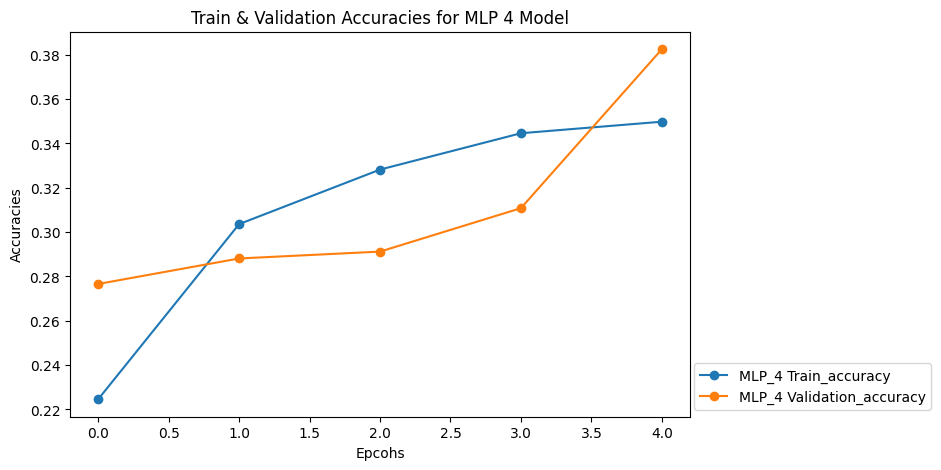

In [27]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Accuracies for MLP 4 Model')
plt.plot(history_mlp4.history['accuracy'], label = 'MLP_4 Train_accuracy', marker = 'o')
plt.plot(history_mlp4.history['val_accuracy'], label = 'MLP_4 Validation_accuracy', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Accuracies')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

In [28]:
model_mlp5 = Sequential()
model_mlp5.add(Flatten(input_shape = (32,32,3)))
model_mlp5.add(Dense(1024, activation='sigmoid'))
model_mlp5.add(Dense(512, activation='sigmoid'))
model_mlp5.add(Dense(256, activation='sigmoid'))
model_mlp5.add(Dense(no_classes, activation='softmax'))
model_mlp5.summary()
model_mlp5.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________


In [29]:
history_mlp5 = model_mlp5.fit(x_train_new, y_train_new, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 11s 32ms/step - loss: 2.1836 - accuracy: 0.1548 - val_loss: 2.0404 - val_accuracy: 0.2257
Epoch 2/5
313/313 [==============================] - 10s 33ms/step - loss: 2.0031 - accuracy: 0.2493 - val_loss: 1.9303 - val_accuracy: 0.2856
Epoch 3/5
313/313 [==============================] - 11s 35ms/step - loss: 1.9325 - accuracy: 0.2902 - val_loss: 1.9108 - val_accuracy: 0.2947
Epoch 4/5
313/313 [==============================] - 10s 32ms/step - loss: 1.8826 - accuracy: 0.3071 - val_loss: 1.8456 - val_accuracy: 0.3303
Epoch 5/5
313/313 [==============================] - 10s 30ms/step - loss: 1.8491 - accuracy: 0.3179 - val_loss: 1.8395 - val_accuracy: 0.3153


When comparing to the model_mlp4 we added the extra layer with 256 neurons, this makes model slight complex and it gives minimum variation in accuracy in model_mlp5

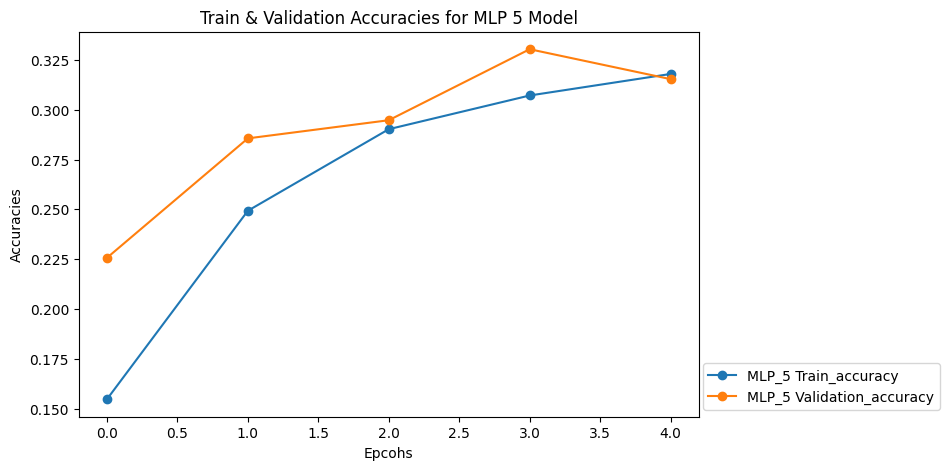

In [30]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Accuracies for MLP 5 Model')
plt.plot(history_mlp5.history['accuracy'], label = 'MLP_5 Train_accuracy', marker = 'o')
plt.plot(history_mlp5.history['val_accuracy'], label = 'MLP_5 Validation_accuracy', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Accuracies')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

Plotting the Train and Validation Accuracies for Different MLP models from Model 1 to Model 5 for the 5 Epochs with the batch size of 32


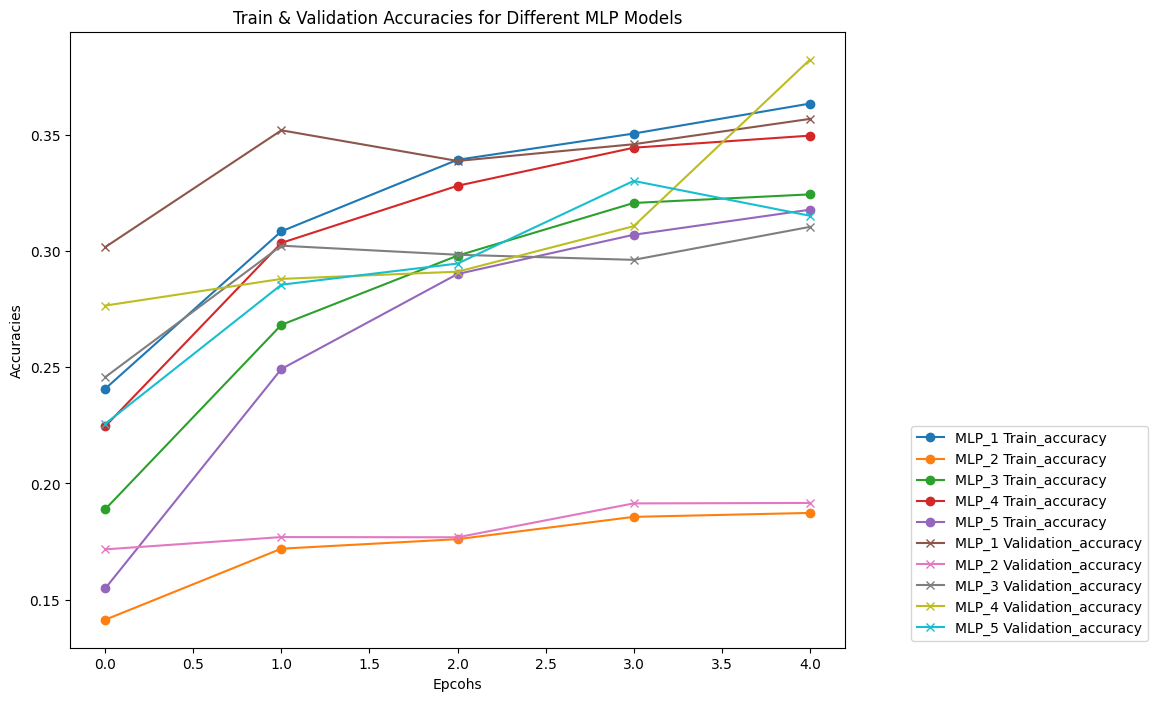

In [31]:
plt.figure(figsize=(10,8))
plt.title('Train & Validation Accuracies for Different MLP Models')
plt.plot(history_mlp1.history['accuracy'], label = 'MLP_1 Train_accuracy', marker = 'o')
plt.plot(history_mlp2.history['accuracy'], label = 'MLP_2 Train_accuracy', marker = 'o')
plt.plot(history_mlp3.history['accuracy'], label = 'MLP_3 Train_accuracy', marker = 'o')
plt.plot(history_mlp4.history['accuracy'], label = 'MLP_4 Train_accuracy', marker = 'o')
plt.plot(history_mlp5.history['accuracy'], label = 'MLP_5 Train_accuracy', marker = 'o')
plt.plot(history_mlp1.history['val_accuracy'], label = 'MLP_1 Validation_accuracy', marker = 'x')
plt.plot(history_mlp2.history['val_accuracy'], label = 'MLP_2 Validation_accuracy', marker = 'x')
plt.plot(history_mlp3.history['val_accuracy'], label = 'MLP_3 Validation_accuracy', marker = 'x')
plt.plot(history_mlp4.history['val_accuracy'], label = 'MLP_4 Validation_accuracy', marker = 'x')
plt.plot(history_mlp5.history['val_accuracy'], label = 'MLP_5 Validation_accuracy', marker = 'x')
plt.xlabel('Epcohs')
plt.ylabel('Accuracies')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

Plotting the Train and Validation Loss for the Different MLP Models for the 5 epochs and batch size of 32

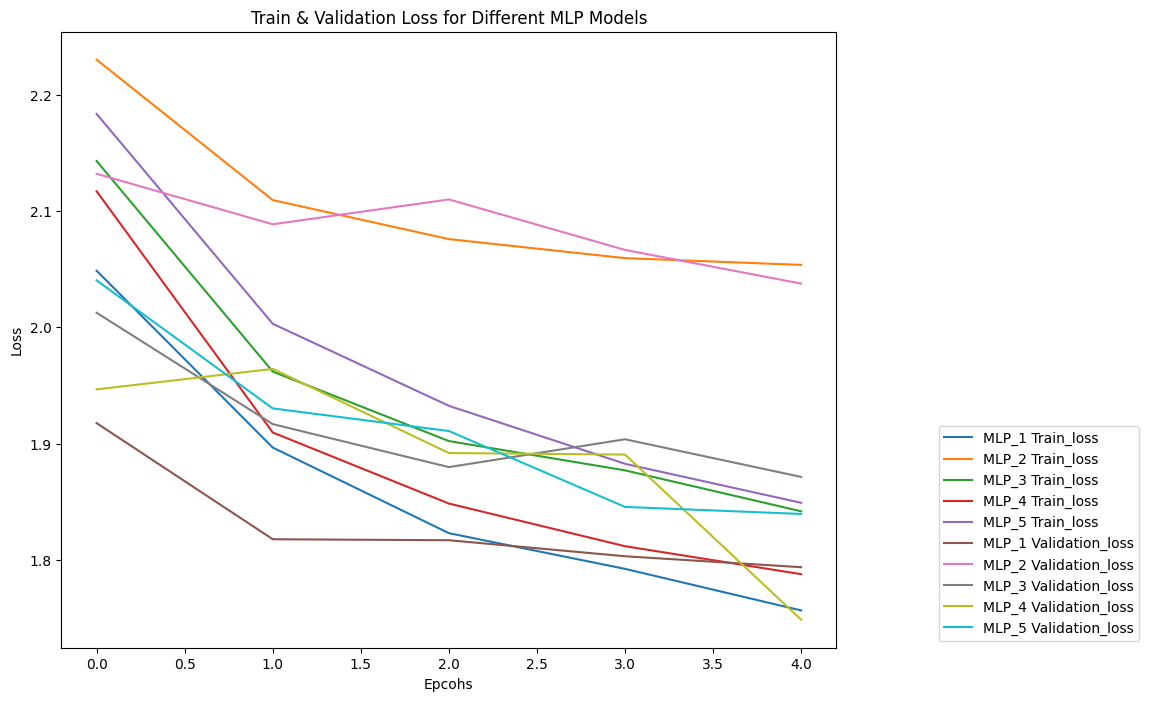

In [32]:
plt.figure(figsize=(10,8))
plt.title('Train & Validation Loss for Different MLP Models')
plt.plot(history_mlp1.history['loss'], label = 'MLP_1 Train_loss')
plt.plot(history_mlp2.history['loss'], label = 'MLP_2 Train_loss')
plt.plot(history_mlp3.history['loss'], label = 'MLP_3 Train_loss')
plt.plot(history_mlp4.history['loss'], label = 'MLP_4 Train_loss')
plt.plot(history_mlp5.history['loss'], label = 'MLP_5 Train_loss')
plt.plot(history_mlp1.history['val_loss'], label = 'MLP_1 Validation_loss')
plt.plot(history_mlp2.history['val_loss'], label = 'MLP_2 Validation_loss')
plt.plot(history_mlp3.history['val_loss'], label = 'MLP_3 Validation_loss')
plt.plot(history_mlp4.history['val_loss'], label = 'MLP_4 Validation_loss')
plt.plot(history_mlp5.history['val_loss'], label = 'MLP_5 Validation_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

In [33]:
accuracies = {
    'Model': ['MLP_1', 'MLP_2', 'MLP_3', 'MLP_4', 'MLP_5'],
    'Train Accuracy': [history_mlp1.history['accuracy'][-1], history_mlp2.history['accuracy'][-1],
                       history_mlp3.history['accuracy'][-1], history_mlp4.history['accuracy'][-1],
                       history_mlp5.history['accuracy'][-1]],
    'Validation Accuracy': [history_mlp1.history['val_accuracy'][-1], history_mlp2.history['val_accuracy'][-1],
                            history_mlp3.history['val_accuracy'][-1], history_mlp4.history['val_accuracy'][-1],
                            history_mlp5.history['val_accuracy'][-1]]
}
acc_df = pd.DataFrame(accuracies)
acc_df

,Model,Train Accuracy,Validation Accuracy
0,MLP_1,0.3636,0.3570
1,MLP_2,0.1873,0.1916
2,MLP_3,0.3245,0.3105
3,MLP_4,0.3498,0.3825
4,MLP_5,0.3179,0.3153


From the analysis it seems like Model MLP 4 performs well both in the train and test datasets

2- CNN1
- Build a Convolutional neural network with the following architecture:
- 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
- 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
- Fully connected (Dense) layer with 512 units and a sigmoid activation function
- Fully connected layer with 512 units and a sigmoid activation function
- Output layer with the suitable activation function and number of neurons for the classification task

In [34]:
model_cnn1 = Sequential()
model_cnn1.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (32,32,3)))
model_cnn1.add(Conv2D(64, (3,3), activation = 'relu'))
model_cnn1.add(Flatten())
model_cnn1.add(Dense(512, activation='sigmoid'))
model_cnn1.add(Dense(512, activation='sigmoid'))
model_cnn1.add(Dense(no_classes, activation='softmax'))
model_cnn1.summary()
model_cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 50176)             0         
                                                                 
 dense_20 (Dense)            (None, 512)               25690624  
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 10)                5130      
                                                                 
Total params: 25,997,130
Trainable params: 25,997,130


In [35]:
history_cnn1 = model_cnn1.fit(x_train_new, y_train_new, batch_size=batch, epochs=epoch, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 81s 256ms/step - loss: 1.7792 - accuracy: 0.3479 - val_loss: 1.5695 - val_accuracy: 0.4334
Epoch 2/5
313/313 [==============================] - 78s 250ms/step - loss: 1.3762 - accuracy: 0.5017 - val_loss: 1.3313 - val_accuracy: 0.5256
Epoch 3/5
313/313 [==============================] - 80s 257ms/step - loss: 1.0588 - accuracy: 0.6190 - val_loss: 1.3018 - val_accuracy: 0.5423
Epoch 4/5
313/313 [==============================] - 78s 248ms/step - loss: 0.7201 - accuracy: 0.7550 - val_loss: 1.3648 - val_accuracy: 0.5545
Epoch 5/5
313/313 [==============================] - 79s 251ms/step - loss: 0.3515 - accuracy: 0.8902 - val_loss: 1.5525 - val_accuracy: 0.5465


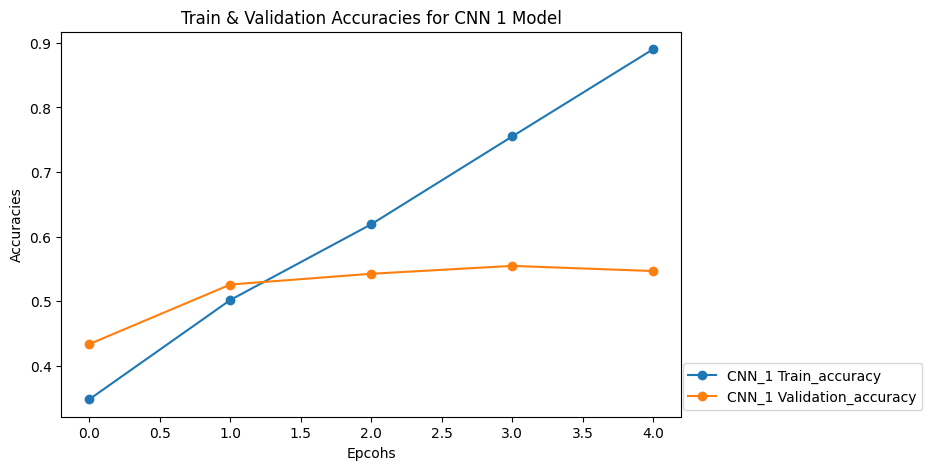

In [36]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Accuracies for CNN 1 Model')
plt.plot(history_cnn1.history['accuracy'], label = 'CNN_1 Train_accuracy', marker = 'o')
plt.plot(history_cnn1.history['val_accuracy'], label = 'CNN_1 Validation_accuracy', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Accuracies')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

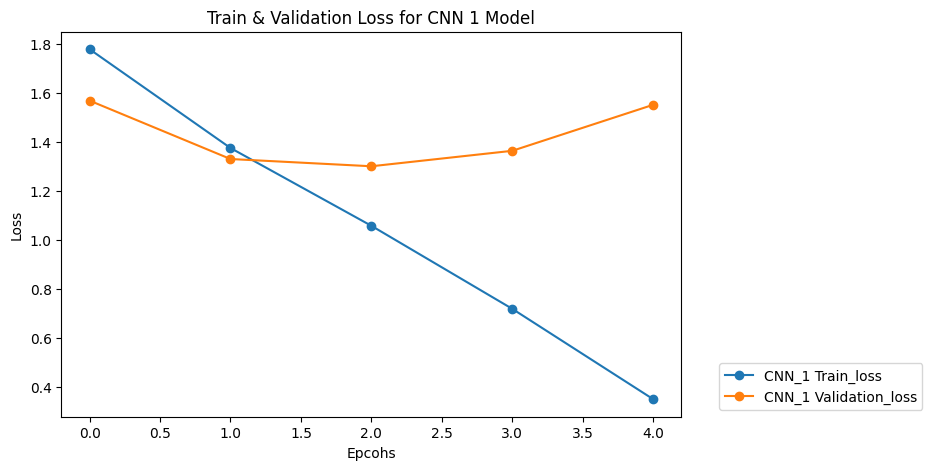

In [37]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Loss for CNN 1 Model')
plt.plot(history_cnn1.history['loss'], label = 'CNN_1 Train_loss', marker = 'o')
plt.plot(history_cnn1.history['val_loss'], label = 'CNN_1 Validation_loss', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

3- CNN2 
- Build a Convolutional Neural network with the following architecture:
- 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
- 2x2 Max pooling layer
- 2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
- 2x2 Max pooling layer
- Fully connected layer with 512 units and a sigmoid activation function
- Dropout layer with 0.2 dropout rate
- Fully connected layer with 512 units and a sigmoid activation function
- Dropout layer with 0.2 dropout rate
- Output layer with the suitable activation function and number of neurons for the classification task


In [38]:
model_cnn2 = Sequential()
model_cnn2.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (32,32,3)))
model_cnn2.add(layers.MaxPooling2D((2, 2)))
model_cnn2.add(Conv2D(64, (3,3), activation = 'relu'))
model_cnn2.add(layers.MaxPooling2D((2, 2)))
model_cnn2.add(Flatten())
model_cnn2.add(Dense(512, activation='sigmoid'))
model_cnn2.add(layers.Dropout(.2))
model_cnn2.add(Dense(512, activation='sigmoid'))
model_cnn2.add(layers.Dropout(.2))
model_cnn2.add(Dense(no_classes, activation='softmax'))
model_cnn2.summary()
model_cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_23 (Dense)            (None, 512)              

In [39]:
history_cnn2 = model_cnn2.fit(x_train_new, y_train_new, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 12s 35ms/step - loss: 2.0069 - accuracy: 0.2524 - val_loss: 1.6180 - val_accuracy: 0.4095
Epoch 2/5
313/313 [==============================] - 10s 33ms/step - loss: 1.5709 - accuracy: 0.4221 - val_loss: 1.4888 - val_accuracy: 0.4555
Epoch 3/5
313/313 [==============================] - 10s 32ms/step - loss: 1.4365 - accuracy: 0.4790 - val_loss: 1.3399 - val_accuracy: 0.5137
Epoch 4/5
313/313 [==============================] - 12s 39ms/step - loss: 1.3079 - accuracy: 0.5290 - val_loss: 1.2786 - val_accuracy: 0.5405
Epoch 5/5
313/313 [==============================] - 11s 34ms/step - loss: 1.2092 - accuracy: 0.5690 - val_loss: 1.2477 - val_accuracy: 0.5541


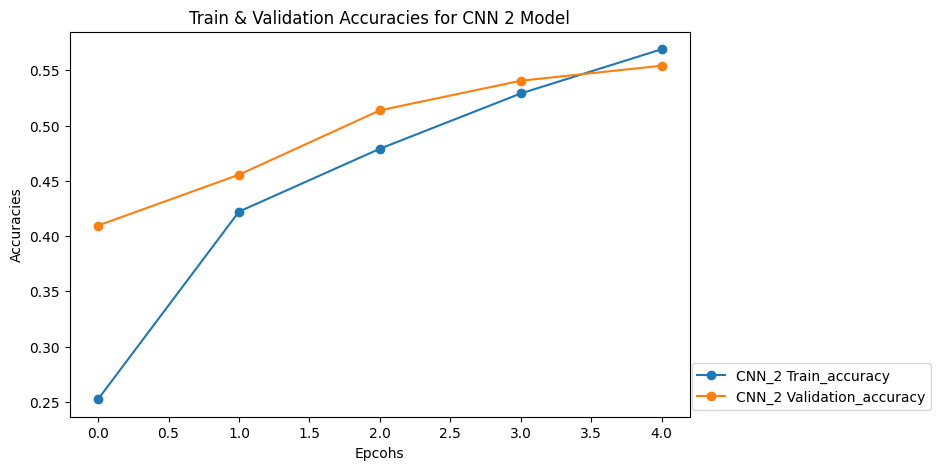

In [40]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Accuracies for CNN 2 Model')
plt.plot(history_cnn2.history['accuracy'], label = 'CNN_2 Train_accuracy', marker = 'o')
plt.plot(history_cnn2.history['val_accuracy'], label = 'CNN_2 Validation_accuracy', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Accuracies')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

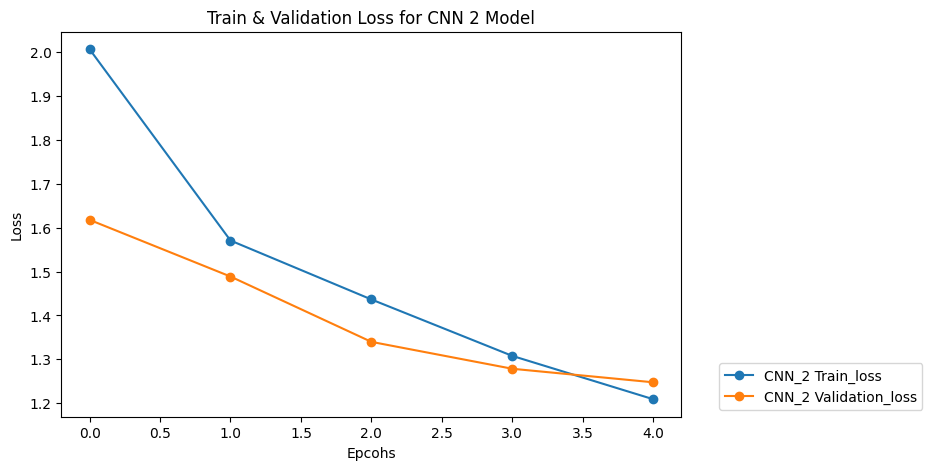

In [41]:
plt.figure(figsize=(8,5))
plt.title('Train & Validation Loss for CNN 2 Model')
plt.plot(history_cnn2.history['loss'], label = 'CNN_2 Train_loss', marker = 'o')
plt.plot(history_cnn2.history['val_loss'], label = 'CNN_2 Validation_loss', marker = 'o')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))
plt.show()

Plot Train accuracy for Comparison for all the three given default models
- MLP
- CNN 1
- CNN 2

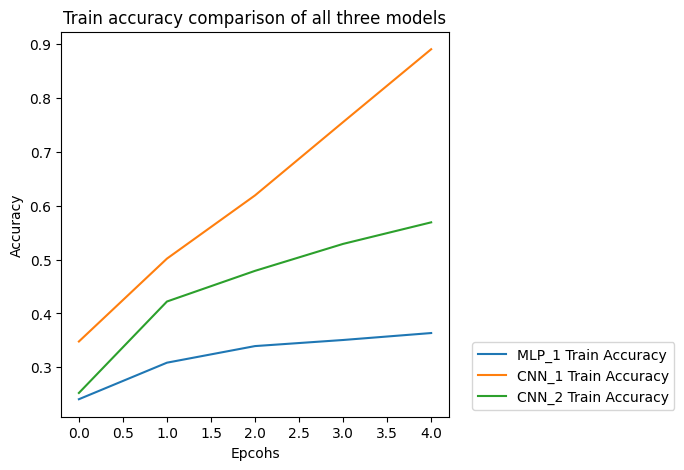

In [42]:
plt.figure(figsize=(5,5))
plt.title('Train accuracy comparison of all three models')
plt.plot(history_mlp1.history['accuracy'], label = 'MLP_1 Train Accuracy')
plt.plot(history_cnn1.history['accuracy'], label = 'CNN_1 Train Accuracy')
plt.plot(history_cnn2.history['accuracy'], label = 'CNN_2 Train Accuracy')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.6, 0))
plt.show()

Plot Validation accuracy for Comparison for all the three given default models
- MLP
- CNN 1
- CNN 2

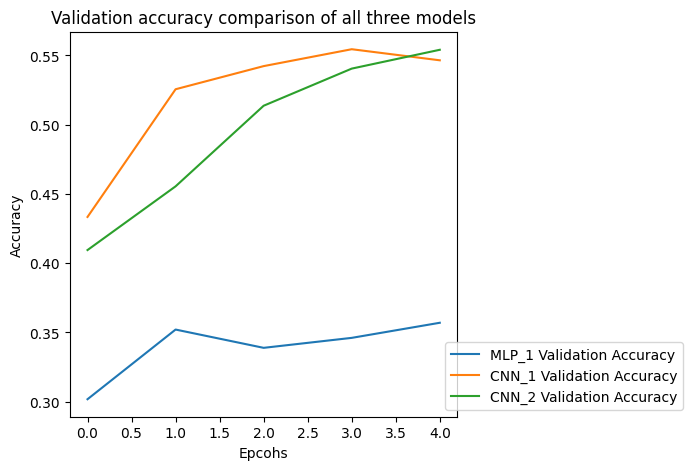

In [43]:
plt.figure(figsize=(5,5))
plt.title('Validation accuracy comparison of all three models')
plt.plot(history_mlp1.history['val_accuracy'], label = 'MLP_1 Validation Accuracy')
plt.plot(history_cnn1.history['val_accuracy'], label = 'CNN_1 Validation Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label = 'CNN_2 Validation Accuracy')
plt.xlabel('Epcohs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.6, 0))
plt.show()

Accuracy and Loss Comparison for two cnn models for train dataset

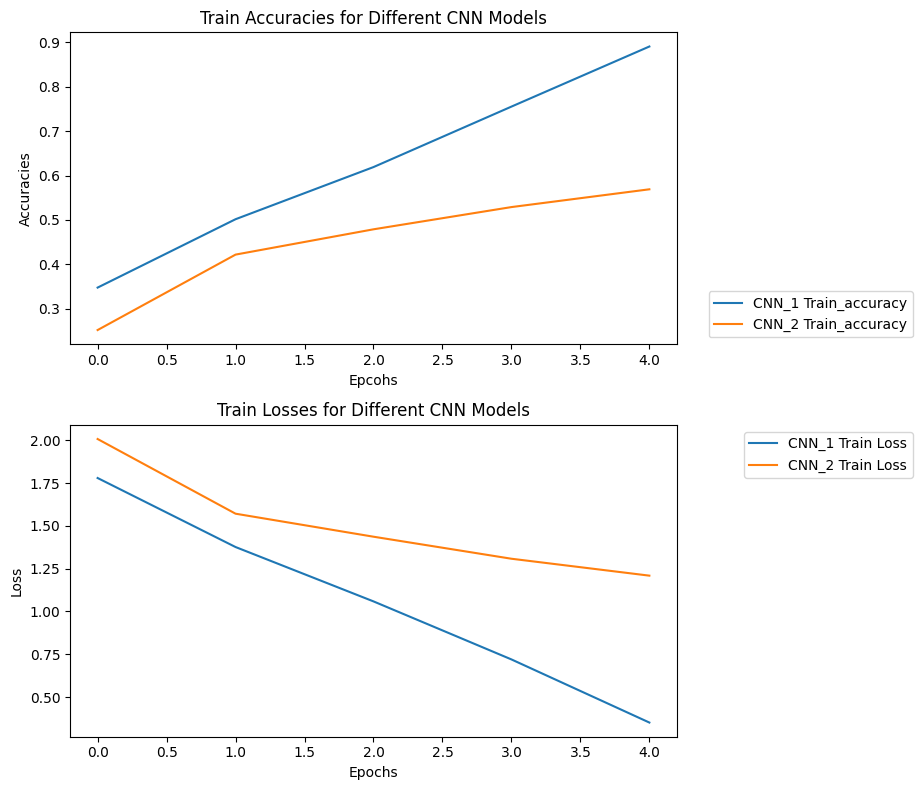

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.set_title('Train Accuracies for Different CNN Models')
ax1.plot(history_cnn1.history['accuracy'], label = 'CNN_1 Train_accuracy')
ax1.plot(history_cnn2.history['accuracy'], label = 'CNN_2 Train_accuracy')
ax1.set_xlabel('Epcohs')
ax1.set_ylabel('Accuracies')
ax1.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))

ax2.plot(history_cnn1.history['loss'], label='CNN_1 Train Loss')
ax2.plot(history_cnn2.history['loss'], label='CNN_2 Train Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Train Losses for Different CNN Models')
ax2.legend(loc='upper right', bbox_to_anchor=(1.4, 1))


plt.tight_layout()


plt.show()

Accuracy and Loss Comparison for two cnn models for validation dataset

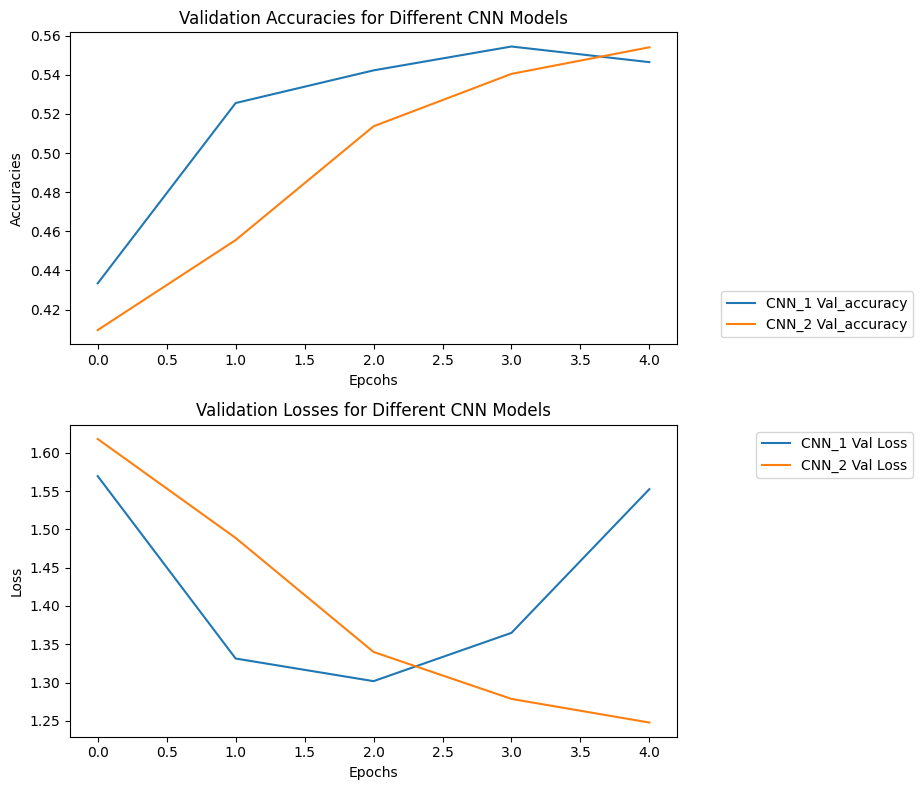

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.set_title('Validation Accuracies for Different CNN Models')
ax1.plot(history_cnn1.history['val_accuracy'], label = 'CNN_1 Val_accuracy')
ax1.plot(history_cnn2.history['val_accuracy'], label = 'CNN_2 Val_accuracy')
ax1.set_xlabel('Epcohs')
ax1.set_ylabel('Accuracies')
ax1.legend(loc = 'lower right', bbox_to_anchor=(1.4, 0))

ax2.plot(history_cnn1.history['val_loss'], label='CNN_1 Val Loss')
ax2.plot(history_cnn2.history['val_loss'], label='CNN_2 Val Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Validation Losses for Different CNN Models')
ax2.legend(loc='upper right', bbox_to_anchor=(1.4, 1))


plt.tight_layout()


plt.show()

Analysis: Training the CNN Models for more epochs

In [46]:
cnn1_epoch_test = model_cnn1.fit(x_train_new, y_train_new, batch_size=batch, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
313/313 [==============================] - 92s 295ms/step - loss: 0.1151 - accuracy: 0.9737 - val_loss: 1.7823 - val_accuracy: 0.5442
Epoch 2/10
313/313 [==============================] - 92s 295ms/step - loss: 0.0356 - accuracy: 0.9938 - val_loss: 1.9273 - val_accuracy: 0.5479
Epoch 3/10
313/313 [==============================] - 93s 296ms/step - loss: 0.0113 - accuracy: 0.9986 - val_loss: 1.9579 - val_accuracy: 0.5549
Epoch 4/10
313/313 [==============================] - 93s 297ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 1.9815 - val_accuracy: 0.5634
Epoch 5/10
313/313 [==============================] - 93s 297ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0264 - val_accuracy: 0.5638
Epoch 6/10
313/313 [==============================] - 91s 290ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.0701 - val_accuracy: 0.5646
Epoch 7/10
313/313 [==============================] - 90s 286ms/step - loss: 9.9883e-04 - accuracy: 1.0000 - val_loss: 2.0925 - va

In [47]:
cnn2_epoch_test = model_cnn2.fit(x_train_new, y_train_new, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
313/313 [==============================] - 16s 52ms/step - loss: 1.1181 - accuracy: 0.6004 - val_loss: 1.2317 - val_accuracy: 0.5633
Epoch 2/10
313/313 [==============================] - 16s 50ms/step - loss: 1.0081 - accuracy: 0.6376 - val_loss: 1.2846 - val_accuracy: 0.5471
Epoch 3/10
313/313 [==============================] - 16s 51ms/step - loss: 0.9173 - accuracy: 0.6761 - val_loss: 1.1516 - val_accuracy: 0.5922
Epoch 4/10
313/313 [==============================] - 16s 51ms/step - loss: 0.8084 - accuracy: 0.7160 - val_loss: 1.1949 - val_accuracy: 0.6011
Epoch 5/10
313/313 [==============================] - 17s 53ms/step - loss: 0.6853 - accuracy: 0.7609 - val_loss: 1.2026 - val_accuracy: 0.6000
Epoch 6/10
313/313 [==============================] - 16s 52ms/step - loss: 0.5660 - accuracy: 0.8055 - val_loss: 1.2486 - val_accuracy: 0.6113
Epoch 7/10
313/313 [==============================] - 16s 51ms/step - loss: 0.4769 - accuracy: 0.8358 - val_loss: 1.3916 - val_accuracy:

Improvement of the Network Architecture to improve accuracy

In [48]:
model_cnn3 = Sequential()
model_cnn3.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn3.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn3.add(MaxPooling2D((2, 2)))

model_cnn3.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn3.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn3.add(MaxPooling2D((2, 2)))

model_cnn3.add(Flatten())
model_cnn3.add(Dense(128, activation='relu'))
model_cnn3.add(Dense(128, activation='relu'))
model_cnn3.add(layers.Dropout(0.2))
model_cnn3.add(Dense(no_classes, activation='softmax'))

model_cnn3.summary()
model_cnn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                  

In [49]:
history_cnn3 = model_cnn3.fit(x_train_new, y_train_new, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 40s 121ms/step - loss: 2.0506 - accuracy: 0.2163 - val_loss: 1.8300 - val_accuracy: 0.3010
Epoch 2/5
313/313 [==============================] - 37s 119ms/step - loss: 1.6231 - accuracy: 0.4041 - val_loss: 1.5247 - val_accuracy: 0.4522
Epoch 3/5
313/313 [==============================] - 37s 119ms/step - loss: 1.4138 - accuracy: 0.4889 - val_loss: 1.3810 - val_accuracy: 0.4927
Epoch 4/5
313/313 [==============================] - 37s 119ms/step - loss: 1.2549 - accuracy: 0.5501 - val_loss: 1.3078 - val_accuracy: 0.5365
Epoch 5/5
313/313 [==============================] - 37s 119ms/step - loss: 1.1209 - accuracy: 0.6060 - val_loss: 1.2063 - val_accuracy: 0.5799


In [50]:
results = {
    'Models': ['CNN 1', 'CNN 2', 'CNN 3'],
    'Validation Accuracy': [history_cnn1.history['val_accuracy'][-1],
                            history_cnn2.history['val_accuracy'][-1],
                            history_cnn3.history['val_accuracy'][-1]]
}

df_resu = pd.DataFrame(results)
print(df_resu)

  Models  Validation Accuracy
0  CNN 1               0.5465
1  CNN 2               0.5541
2  CNN 3               0.5799
